# Ch03 Image Processing  
**목차**  
1. [Binarization](#binarization)


## Binarization

**이진화**  
임계값 T를 기준으로 임계값보다 큰 화소는 1로 작은 화소는 0인 이진 영상으로 바꾸는 처리  

  $$ b(j,i) = \begin{cases} 1,f(j,i) \geq T \\ 0,f(j,i) < T \end{cases} $$

임계값 T를 잡기 위한 가장 간단한 방법은 Histogram기반으로 잡는 것입니다. 
간단히 Opencv를 통해 이미지를 불러고 Histogram을 확인한 후  Otsu 알고리즘을 통해 이진화를 해보겠습니다.

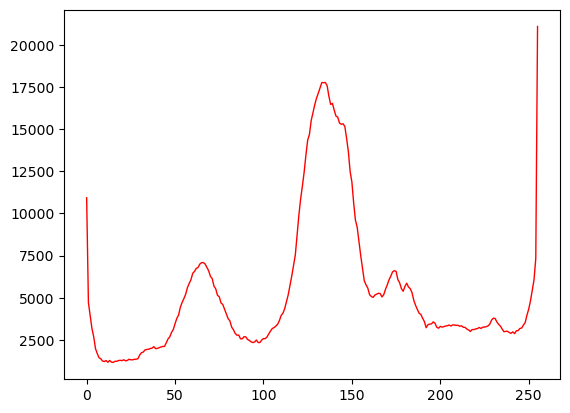

In [1]:
## 히스토그램 시각화
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("images/soccer.jpg")
# calcHist의 인수 : 이미지, 채널, 마스크 : 히스토그램을 구할 영역지정, 히스토그램 크기, 범위
h =cv.calcHist([img],[2],None,[256],[0,256]) # 2번 채널인 Red값에 대한 Histogram시각화
plt.plot(h,color='r', linewidth=1)

간단히 T를 선정할 때는 히스토그램에서 계곡(많은 픽셀값이 존재하다 작아지는 부분)을 기준으로 나눈다.   그러나 본 영상에서는 계곡이 3개이고 작은 계곡들이 많이 존재하여 이를 단순히 나누기는 조금 어려움이 있습니다. 따라서 우리는 Otus알고리즘을 통해 이진화를 진행해 보겠습니다.

**Otsu 알고리즘**  
Otsu 알고리즘은 아래의 식을 최적화하는 T를 찾는 방식으로 이진화를 진행하였습니다.
$$ \hat{t} = argmin\;J(t)\;t\in {0,1,2,3...,L-1} $$

여기서 목적함수인 J(t)는 특정 임계값 t로 이진화 하였을 때 0인화소와 1이되는 화소의 가중치 합을 의미합니다. 여기서 가중치는 각 화소의 갯수를 의미하고수식적으로 보면 다음과 같습니다. 

$$ J(t) = n_{0}(t)v_{0} + n_{1}(t)v_{1}(t) $$

n은 각각 화소의 갯수 v는 각각 화소의 분산입니다.

다음으로 opencv를 통핸 otsu 알고리즘을 활용하여 이진화를 해보겠습니다.

오츄 알고리즘이 찾은 최적 임계값= 113.0


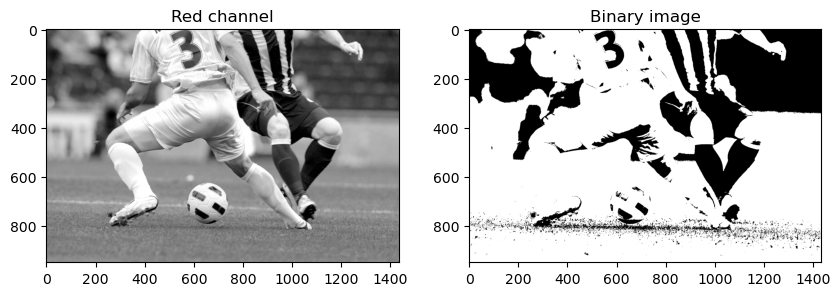

In [12]:
%matplotlib inline
import cv2 as cv
import sys 
import matplotlib.pyplot as plt


img = cv.imread('images/soccer.jpg')
t,bin_img = cv.threshold(img[:,:,2],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print("오츄 알고리즘이 찾은 최적 임계값=",t)

fig,ax =plt.subplots(1,2,figsize=(10, 5))
ax[0].imshow(img[:,:,2],cmap='gray')
ax[0].set_title('Red channel')
ax[1].imshow(bin_img,cmap='gray')
ax[1].set_title('Binary image')

plt.show()